Power System Small-Signal Stability Assessment using Machine Learning
==============
# Introduction

Electric power systems are among the most complex engineering mechanisms constructed by the human kind. Essentially, a power system is responsible for generation (i.e., conversion of energy from a natural available form to electricity), transmission and distribution of electrical energy. The most critical aspect of a power system is that it has to be always in operation: industries cannot stop their production processes, and consumers would desperate if the service is suddenly not available. For this reason, an important analysis in power system operation relates to the _stability_ of the electric grid.

_Small-signal stability_ in a power system can be understood as the "ability of the power system to maintain synchronism, when subjected to small disturbances" [1]. Small disturbances are endogenous or exogenous small-scale events such as simple faults, generator, line or load trippings, component malfuntion or misoperation, among others. The purpose of small-signal analysis is to quantify the effects of those disturbances by linearizing a nonlinear model of a power system around a pre-disturbance equilibrium point. Afterward, linear systems techniques are applied to assess the stability condition and to evaluate potential oscillations caused by the perturbation.

A linear representation of a power system is comprised of matrices. A small-signal analysis is based on the study of the eigenvalues of one of those matrices. The location of the eigenvalues in the complex plane is an excellent indicator of the operating condition of the power system. Therefore, by classifying eigenvalues we can understand better how the power system is behaving under a particular scenario.

The eigenvalues depend not only on the characteristic of the physical components of the power system but also on the particular operating condition of the network. Moreover, the larger a power system is, the more eigenvalues its linear representation will have. For this reason, eigenvalues constitute a source of big data for power system studies.

# Data Generation

Operating measurements in a large-scale electric grid describe mostly normal conditions. Nonetheless, studies in critical scenarios are important. For this reason, synthetic data (i.e., data generated via simulations) can be of paramount significance for any power system study. In this particular case, the data generation process is resumed as follows: in Dymola (software employed for modeling and simulation of dynamic systems) a test power system is constructed. For this case, the system is the IEEE 14 bus model. 

Several line tripping contingencies are applied systematically to obtain numerous simulation scenarios. In other words, the value of a specific parameter of each of the elements in blue is varied in such a fashion that it appears to be "disconnected" from the simulation point of view. Such characterization is known as a contingency. A given contingency represents an instance of a simulation scenario.

For each contingency, a linearization procedure is performed in Dymola, obtaining the eigenvalues of the system matrix that characterizes the operating condition of the system after the applied perturbation. A total of 19815 simulations are generated, each with 49 eigenvalues. Therefore, the resulting number of 970935 eigenvalues. 

# Data Organization

In this first part, data generated via simulations is organized in a Pandas DataFrame using the scenario number in the column labels. The data is then exported to a $\texttt{.pkl}$ format for later use. Before this, we load the required libraries for this work using a magic cell.

In [2]:
%run -i import_libraries.py

The following cell contains the code to create a Pandas DataFrame for the first time using the raw outputs from simulation. If the dataframe already exists, then it loads the data into the variable `df_eigenvalues`

In [27]:
# Getting current working directory
current_dir = os.getcwd()

if not os.path.exists(os.path.join(current_dir, '99_Data/df_eigenvalues.pkl')): 
    ##############################
    # ORGANIZING DATA (first time)
    ##############################
    
    t_0 = time.time() # Measuring time

    # Loading simulation data
    eigs19branches = np.load("99_Data/19Branches_all_eigs.npy")
    print(f"We have {eigs19branches.shape[0]} number of scenarios, \
            each with {eigs19branches.shape[1]} eigenvalues")

    # Creating column labels
    col_labels = []
    for i in range(1, eigs19branches.shape[0] + 1):
        col_labels.append("Scenario {}".format(i))

    # Organizing the data in Pandas
    df_eigenvalues = pd.DataFrame([], columns = col_labels)

    for sc in range(1, eigs19branches.shape[0] + 1):
        df_eigenvalues["Scenario {}".format(sc)] = eigs19branches[(sc - 1)][:]

    with open("99_Data/df_eigenvalues.pkl", 'wb') as f:
        pickle.dump(df_eigenvalues, f, pickle.HIGHEST_PROTOCOL)
        
    print("Elapsed time (organizing data): {t_f:.3f} s".format(t_f = time.time()-t_0))
else:
    ##################################
    # LOADING DATA (already organized)
    ##################################
    
    t_0 = time.time()
    
    # Opening Pandas Dataframe
    with open("99_Data/df_eigenvalues.pkl", 'rb') as f:
        df_eigenvalues = pickle.load(f)
        
    print("Elapsed time (loading data): {t_f:.3f} s".format(t_f = time.time() - t_0))

Elapsed time (loading data): 1.420 s


Now, we visualize some of the eigenvalues for each scenario.

In [4]:
df_eigenvalues.tail()

,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,Scenario 9,Scenario 10,...,Scenario 19806,Scenario 19807,Scenario 19808,Scenario 19809,Scenario 19810,Scenario 19811,Scenario 19812,Scenario 19813,Scenario 19814,Scenario 19815
44,(-1.003827988667938+0j),(-1.0046961044658098-0.0034373726093871924j),(-1.0050944049879866+0j),(-1.0050670283412453+0j),(-1.0052020988546377+0j),(-1.0180250800890478+0j),(-1.0051173692498403+0j),(-1.00382798866839+0j),(-1.0029574771145238-0.0038281762813806657j),(-1.0059599147155815-0.004346536866380381j),...,(-0.9917700201998159-0.00812855048494654j),(-1.0051692055718833+0j),(-1.006315303675973+0j),(-1.005137812052535-0.004192293201145476j),(-1.0038279885604169+0j),(-1.0052047162558404+0j),(-1.0048164574376075+0j),(-1.0180250800890478+0j),(-1.007059664338101+0j),(-1.0049057590709136+0j)
45,(-0.99999999989355+0j),(-0.99999999989355+0j),(-0.99999999989355+0j),(-0.99999999989355+0j),(-0.99999999989355+0j),(-1.000000000051808+0j),(-0.99999999989355+0j),(-0.99999999989355+0j),(-0.99999999989355+0j),(-0.99999999989355+0j),...,(-0.99999999989355+0j),(-0.99999999989355+0j),(-0.99999999989355+0j),(-0.99999999989355+0j),(-0.99999999989355+0j),(-0.99999999989355+0j),(-0.99999999989355+0j),(-1.000000000051808+0j),(-0.99999999989355+0j),(-0.99999999989355+0j)
46,(-1.0180250800890478+0j),(-1.0180250800890478+0j),(-1.0180250800890478+0j),(-1.0180250800890478+0j),(-1.0180250800890478+0j),(-5.135787972088902+0j),(-1.0180250800890478+0j),(-1.0180250800890478+0j),(-1.0180250800890478+0j),(-1.0180250800890478+0j),...,(-1.0180250800890478+0j),(-1.0180250800890478+0j),(-1.0180250800890478+0j),(-1.0180250800890478+0j),(-1.0180250800890478+0j),(-1.0180250800890478+0j),(-1.0180250800890478+0j),(-5.135787972088902+0j),(-1.0180250800890478+0j),(-1.0180250800890478+0j)
47,(-1.000000000051808+0j),(-1.000000000051808+0j),(-1.000000000051808+0j),(-1.000000000051808+0j),(-1.000000000051808+0j),0j,(-1.000000000051808+0j),(-1.000000000051808+0j),(-1.000000000051808+0j),(-1.000000000051808+0j),...,(-1.000000000051808+0j),(-1.000000000051808+0j),(-1.000000000051808+0j),(-1.000000000051808+0j),(-1.000000000051808+0j),(-1.000000000051808+0j),(-1.000000000051808+0j),0j,(-1.000000000051808+0j),(-1.000000000051808+0j)
48,(-5.135787972088902+0j),(-5.135787972088902+0j),(-5.135787972088902+0j),(-5.135787972088902+0j),(-5.135787972088902+0j),(-0.1942501942265118+0j),(-5.135787972088902+0j),(-5.135787972088902+0j),(-5.135787972088902+0j),(-5.135787972088902+0j),...,(-5.135787972088902+0j),(-5.135787972088902+0j),(-5.135787972088902+0j),(-5.135787972088902+0j),(-5.135787972088902+0j),(-5.135787972088902+0j),(-5.135787972088902+0j),(-0.1942501942265118+0j),(-5.135787972088902+0j),(-5.135787972088902+0j)


# Exploratory Data Analysis

In the cell below, we visualize the eigenvalues obtained from simulation without any particular cleaning operation. Due to the large number of scenarios, we only visualize the eigenvalues of 10 scenarios selected randomly.

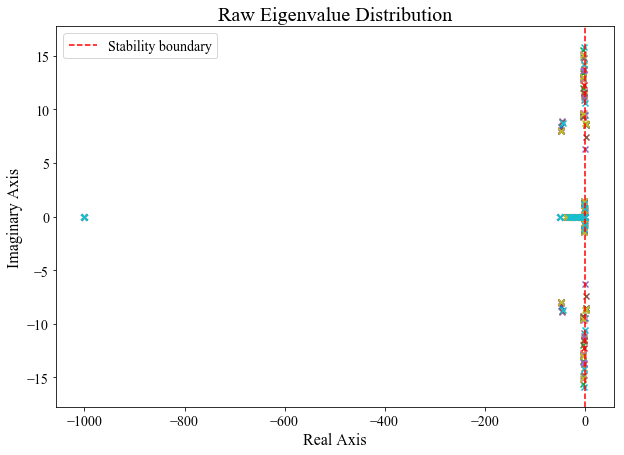

In [49]:
# This cell works properly on Windows
plot_scenarios = np.random.randint(1, df_eigenvalues.shape[1],10)

fig, ax = plt.subplots(figsize = (10, 7))

for sc in plot_scenarios:
    real_part = np.real(df_eigenvalues["Scenario {}".format(sc)][:])
    imag_part = np.imag(df_eigenvalues["Scenario {}".format(sc)][:])
    ax.scatter(real_part, imag_part, marker = 'x')

ax.set_title('Raw Eigenvalue Distribution', fontname = 'Times New Roman', fontsize = 20)
ax.set_xlabel('Real Axis', fontname = 'Times New Roman', fontsize = 16)
ax.set_ylabel('Imaginary Axis', fontname = 'Times New Roman', fontsize = 16)

for tick in ax.get_xticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(14)
for tick in ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(14)
    
ax.axvline(x = 0, color = 'red', linestyle = '--', label = 'Stability boundary') # Drawing stability boundary
ax.legend(prop = {'family' : 'Times New Roman', 'size' : 14})
    
fig.savefig("Figs/Fig_RawEigenvalueDistribution.png", dpi = 300)

## Basic Descriptive Statistics

To show some basic descriptive statistics, we compute the mean, the median and the standard deviation to quantify how the eigenvalues are spread in the complex plane.

In [50]:
# Creating dataframe for statistics
df_statistics_raw = pd.DataFrame([], columns = df_eigenvalues.columns)

for sc in range(1, df_eigenvalues.shape[1] + 1):
    df_statistics_raw["Scenario {}".format(sc)] = \
    np.array([df_eigenvalues["Scenario {}".format(sc)].mean(),
              df_eigenvalues["Scenario {}".format(sc)].median(),
              df_eigenvalues["Scenario {}".format(sc)].std()])
    
df_statistics_raw.head()

,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,Scenario 9,Scenario 10,...,Scenario 19806,Scenario 19807,Scenario 19808,Scenario 19809,Scenario 19810,Scenario 19811,Scenario 19812,Scenario 19813,Scenario 19814,Scenario 19815
0,(-112.64057104320914+3.6252180395923476e-17j),(-113.2931919207321+1.8126090197961737e-16j),(-113.71535591439455+0j),(-113.49774740845007-7.250436079184695e-17j),(-113.49394404782147+3.6252180395923476e-17j),(-113.10016309641333+0j),(-113.56807523599613-7.250436079184695e-17j),(-113.14052238099706+0j),(-113.23452691654101+3.6252180395923476e-17j),(-113.1186831685215+1.0875654118777043e-16j),...,(-113.41469939678568-1.0875654118777043e-16j),(-113.61921943808464-7.250436079184695e-17j),(-113.53419319689151-1.450087215836939e-16j),(-113.33431431678065+1.0875654118777043e-16j),(-113.1181769691094+0j),(-113.63861287298704-2.1751308237554087e-16j),(-113.60737041489487-7.250436079184695e-17j),(-113.03753846524606+0j),(-113.32028221167423-3.6252180395923476e-17j),(-113.57999314505936-3.6252180395923476e-17j)
1,(-2.2303448623036286+9.367706194421926j),(-2.6508102310148542+12.01203063188135j),(-4.344944586306494+9.467973111276692j),(-4.057241586160352+9.497336494127966j),(-4.217833494972319+9.408689189124088j),(-2.2358543026775806+13.97126538318971j),(-4.079542401510674+9.425005957496342j),(-4.107595387659302+9.665444424870092j),(-2.4892532729224253+9.21381016940509j),(-2.662958269605388+9.341817074494646j),...,(-2.762605538589488+9.174267245149515j),(-4.323738602130655+9.414391282305795j),(-3.5318407415620103+9.796642309508512j),(-2.6841921269317806+9.158973905217865j),(-3.910238588916389+9.539650029692762j),(-4.448062488207224+9.463512446652562j),(-4.300016184300028+9.523139157306911j),(-2.5810832194940123+15.769474398075362j),(-2.266111696550179+13.331039134450192j),(-4.094805165517017+9.482175970058076j)
2,(302.7009407644943+0j),(302.498768007665+0j),(302.37687687354816+0j),(302.4425744648179+0j),(302.4434617176182+0j),(302.53640882623256+0j),(302.41927284019926+0j),(302.5595208573482+0j),(302.5166979847154+0j),(302.5526697531845+0j),...,(302.46278484020274+0j),(302.406824185825+0j),(302.4303381193184+0j),(302.4867336085933+0j),(302.56679436326607+0j),(302.40134298787535+0j),(302.40997997638925+0j),(302.58440681483114+0j),(302.49132981137325+0j),(302.4168753650799+0j)


The standard deviation shows that the data is heavily spread. Moreover, the big difference between the median and the mean underlines that the number of "outliers" is huge. In other words, there is no regular pattern regarding the distribution of the eigenvalues.

# Data Cleaning

Given the significative irregularity of the eigenvalues, it is necessary to perform some data cleaning to bring them to a form where the most important information is preserved. The relevant information about the power system operating condition specified by a given eigenvalue is contained in the _angle_ it forms with the positive real-axis. Hence, a magnitude normalization seems to be more convenient for this case. 

Despite this, if the real-part of the eigenvalue is positive, it is _unstable_. In other words, it describes an unstable operating condition of the power system. A standard normalization will map the real eigenvalues close to the imaginary axis (i.e., those having a small negative real-part) to $-1+0j$. This is not desirable since it hiddens the fact that the eigenvalue is close to the region of instability. For this reason, the normalization procedure carried in the cell below is an ad-hoc solution that normalizes only the eigenvalues outside of the unit circle in the complex plane: that is, only the eigenvalues whose magnitude is strictly larger or equal than one are normalized.

In [51]:
current_wd = os.getcwd()

if not os.path.exists(os.path.join(current_wd, "99_Data/df_normalized_eigenvalues.pkl")):
    ##################################
    # NORMALIZING EIGENVALUES
    ##################################

    t_0 = time.time()
    
    # Creating new Pandas DataFrame for normalized eigenvalues
    df_normalized_eigenvalues = pd.DataFrame([], columns = \
                                             list(df_eigenvalues.columns.values))   

    # Lambda expression to normalize only the eigenvalues outside the unit circle
    norm_scalar = lambda eig : (eig / np.sqrt(np.power(eig.real, 2) + \
                                              np.power(eig.imag, 2))
                        if np.sqrt(np.power(eig.real, 2) + np.power(eig.imag, 2)) >= 1
                        else eig)
    
    # Vectorizing the lambda expresion defined before
    norm_vector = np.vectorize(norm_scalar)
    
    # Normalizing eigenvalues
    for sc in list(df_eigenvalues.columns.values):
        df_normalized_eigenvalues[sc] = norm_vector(df_eigenvalues[sc][:])

    # Saving normalized eigenvalues
    with open("99_Data/df_normalized_eigenvalues.pkl", 'wb') as f:
        pickle.dump(df_normalized_eigenvalues, f, pickle.HIGHEST_PROTOCOL)           
    
    print("Elapsed time (normalizing eigenvalues): {t_f:.3f} s".format(t_f = time.time() - t_0))
else:
    t_0 = time.time()      
    with open("99_Data/df_normalized_eigenvalues.pkl", 'rb') as f:
        df_normalized_eigenvalues = pickle.load(f)
        
    print("Elapsed time (loading data): {t_f:.3f} s".format(t_f = time.time() - t_0))

Elapsed time (loading data): 1.429 s


We get a look to the tidy-up data below. Notice that all real and stable eigenvalues are mapped into $-1+0j$ if they are outside of the unit circle.

In [47]:
df_normalized_eigenvalues.head()

,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,Scenario 9,Scenario 10,...,Scenario 19806,Scenario 19807,Scenario 19808,Scenario 19809,Scenario 19810,Scenario 19811,Scenario 19812,Scenario 19813,Scenario 19814,Scenario 19815
0,(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),...,(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j)
1,(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),...,(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j)
2,(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),...,(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j)
3,(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),...,(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j)
4,(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),...,(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j)


Finally, we plot some normalized eigenvalues for some random scenarios to see the effect of the normalization.

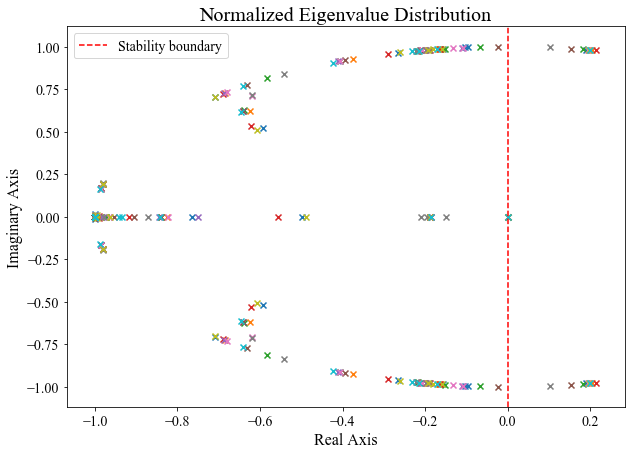

In [52]:
plot_scenarios = np.random.randint(1, df_normalized_eigenvalues.shape[1],10)

fig, ax = plt.subplots(figsize = (10, 7))

for sc in plot_scenarios:
    real_part = np.real(df_normalized_eigenvalues["Scenario {}".format(sc)][:])
    imag_part = np.imag(df_normalized_eigenvalues["Scenario {}".format(sc)][:])
    ax.scatter(real_part, imag_part, marker = 'x')
    
ax.set_title('Normalized Eigenvalue Distribution', fontname = 'Times New Roman', fontsize = 20)
ax.set_xlabel('Real Axis', fontname = 'Times New Roman', fontsize = 16)
ax.set_ylabel('Imaginary Axis', fontname = 'Times New Roman', fontsize = 16)

for tick in ax.get_xticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(14)
for tick in ax.get_yticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_fontsize(14)
    
ax.axvline(x = 0, color = 'red', linestyle = '--', label = 'Stability boundary') # Drawing stability boundary
ax.legend(prop = {'family' : 'Times New Roman', 'size' : 14})
    
fig.savefig("Figs/Fig_NormalizedEigenvalueDistribution.png", dpi = 300)

In [14]:
# Creating dataframe for statistics after cleaning
df_statistics_tidy = pd.DataFrame([], columns = col_labels)

for sc in range(1, df_normalized_eigenvalues.shape[1] + 1):
    df_statistics_tidy["Scenario {}".format(sc)] = np.array(
        [df_normalized_eigenvalues["Scenario {}".format(sc)].mean(),
              df_normalized_eigenvalues["Scenario {}".format(sc)].median(),
              df_normalized_eigenvalues["Scenario {}".format(sc)].std()])
    
df_statistics_tidy.head()

,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,Scenario 9,Scenario 10,...,Scenario 19806,Scenario 19807,Scenario 19808,Scenario 19809,Scenario 19810,Scenario 19811,Scenario 19812,Scenario 19813,Scenario 19814,Scenario 19815
0,(-0.705816463812297+4.5315225494904345e-18j),(-0.7419601559955333+0j),(-0.7590369861018521+4.5315225494904345e-18j),(-0.7481155937091838+9.063045098980869e-18j),(-0.7534622525046417+4.5315225494904345e-18j),(-0.7347146275111434-2.2657612747452172e-18j),(-0.7523536510852841-4.5315225494904345e-18j),(-0.7282494332192926+0j),(-0.737369732682144+0j),(-0.7314280708860428+0j),...,(-0.7457244729191819+4.5315225494904345e-18j),(-0.756402450516185+0j),(-0.7504193829065184+4.5315225494904345e-18j),(-0.7429339854677944-9.063045098980869e-18j),(-0.7279951952770672+2.2657612747452172e-18j),(-0.7580047172863442+9.063045098980869e-18j),(-0.7569784114120387-9.063045098980869e-18j),(-0.7213609555444791+0j),(-0.7406856645962876-1.3594567648471304e-17j),(-0.7550394688504957+0j)
1,(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-0.99999999989355+0j),(-0.99999999989355+0j),...,(-0.99999999989355+0j),(-1+0j),(-1+0j),(-0.99999999989355+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j),(-1+0j)
2,(0.6189406682185589+0j),(0.6205949881850097+0j),(0.6136708547320365+0j),(0.626664443757347+0j),(0.6138325082459348+0j),(0.5353009721877457+0j),(0.6164941429505744+0j),(0.6076391501759791+0j),(0.6247928888509497+0j),(0.6339516319707593+0j),...,(0.6173708396600059+0j),(0.6144835516855405+0j),(0.6200459826349787+0j),(0.6197889778412445+0j),(0.6108604306869119+0j),(0.6119725384665822+0j),(0.6177450481423067+0j),(0.608120648215941+0j),(0.6228067046947023+0j),(0.6201814526709769+0j)


Thanks to the cleaning process, the eigenvalues are closer to each other. Moreover, the relevant information (angle) for analysis purposes is preserved. This is important for the future development of classification algorithms since they would be able to identify the relevant feature about each eigenvalue more easily. Finally, we save the Pandas dataframe with the cleaned data and the corresponding descriptive statistics.

In [15]:
with open("99_Data/df_normalized_eigenvalues.pkl", 'wb') as f:
    pickle.dump(df_normalized_eigenvalues, f, pickle.HIGHEST_PROTOCOL)
    
with open("99_Data/df_statistics_raw.pkl", 'wb') as f:
    pickle.dump(df_statistics_raw, f, pickle.HIGHEST_PROTOCOL)    

with open("99_Data/df_normalized_eigenvalues.pkl", 'wb') as f:
    pickle.dump(df_statistics_tidy, f, pickle.HIGHEST_PROTOCOL)

# References
[1] P. Kundur. _Power System Stability and Control_. McGraw-Hill, 1994.